In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HARGA RUMAH JAKSEL.xlsx to HARGA RUMAH JAKSEL (1).xlsx


In [3]:
df = pd.read_excel("HARGA RUMAH JAKSEL.xlsx")

In [4]:
print("📋 5 Data Pertama:")
display(df.head())

print("\n📊 Info Dataset:")
print(df.info())


📋 5 Data Pertama:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,HARGA,LT,LB,JKT,JKM,GRS,KOTA
1,28000000000,1100,700,5,6,ADA,JAKSEL
2,19000000000,824,800,4,4,ADA,JAKSEL
3,4700000000,500,400,4,3,ADA,JAKSEL
4,4900000000,251,300,5,4,ADA,JAKSEL



📊 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   object
 1   Unnamed: 1  1002 non-null   object
 2   Unnamed: 2  1002 non-null   object
 3   Unnamed: 3  1002 non-null   object
 4   Unnamed: 4  1002 non-null   object
 5   Unnamed: 5  1002 non-null   object
 6   Unnamed: 6  1002 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB
None


In [8]:
if 'HARGA' not in df.columns:
    df.columns = df.iloc[0]  # set baris pertama jadi header
    df = df[1:]              # hapus baris pertama dari data
    df.reset_index(drop=True, inplace=True)

# Hapus spasi di nama kolom
df.columns = df.columns.str.strip()

print("📋 Kolom yang terbaca:")
print(df.columns.tolist())

display(df.head())

📋 Kolom yang terbaca:
['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']


,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL



✅ Data setelah dibersihkan:


,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,2.800000e+10,1100,700,5,6,1,JAKSEL
1,1.900000e+10,824,800,4,4,1,JAKSEL
2,4.700000e+09,500,400,4,3,1,JAKSEL
3,4.900000e+09,251,300,5,4,1,JAKSEL
4,2.800000e+10,1340,575,4,5,1,JAKSEL


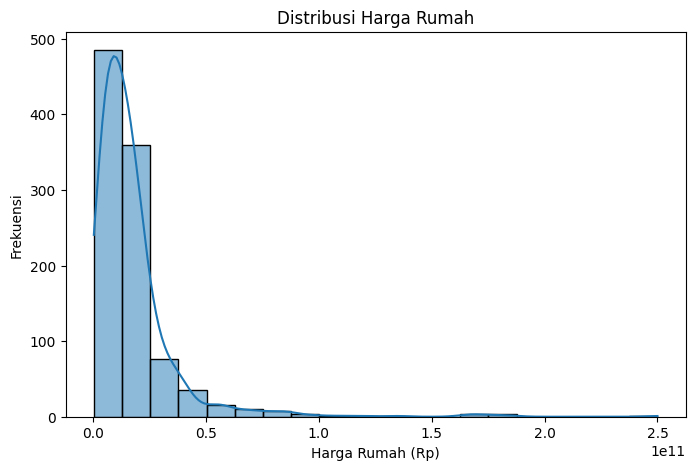

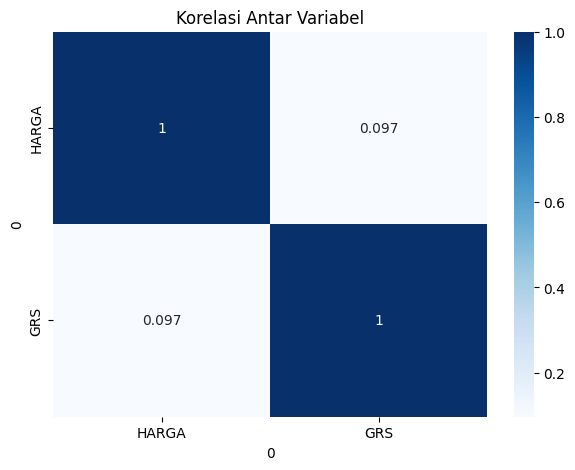

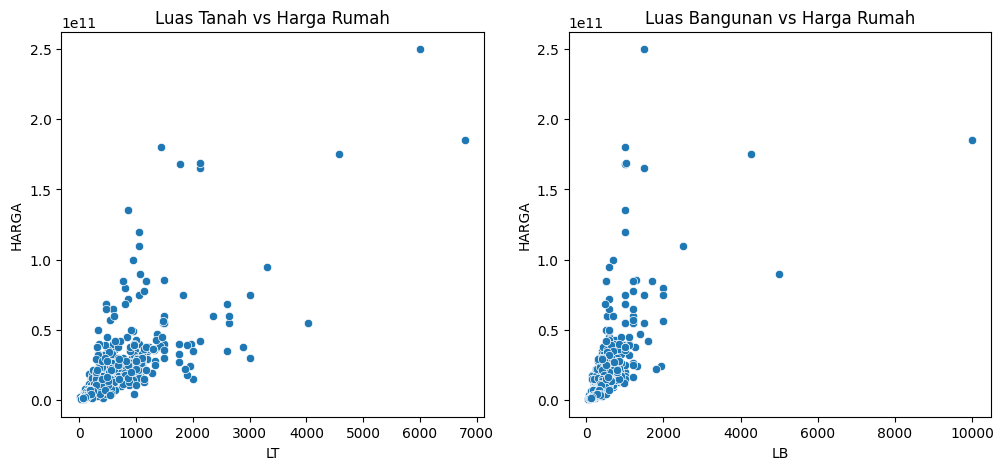

📈 Evaluasi Model:
R² Score : 0.4851
MSE       : 76695956418891644928.00
RMSE      : 8757622760.71


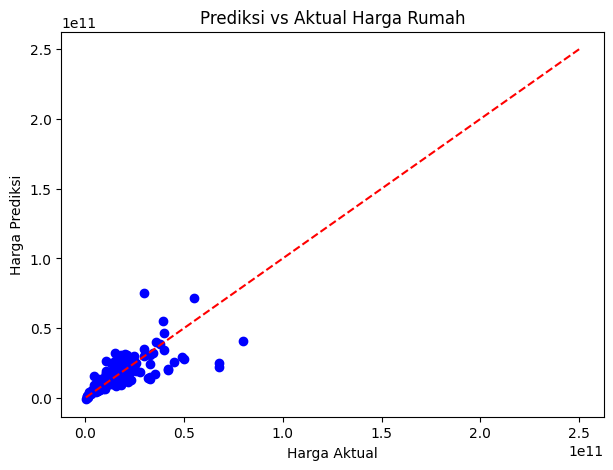


📊 Pengaruh Masing-masing Faktor:


,Faktor,Koefisien
0,LT,2.311563e+07
1,LB,1.050420e+07
2,JKT,1.986017e+08
3,JKM,3.334533e+08
4,GRS,1.933948e+09


In [10]:
df.columns = df.columns.str.strip()
df['HARGA'] = df['HARGA'].replace({',': ''}, regex=True).astype(float)
df['GRS'] = df['GRS'].replace({'ADA': 1, 'TIDAK ADA': 0})
df = df.dropna()

print("\n✅ Data setelah dibersihkan:")
display(df.head())
plt.figure(figsize=(8,5))
sns.histplot(df['HARGA'], bins=20, kde=True)
plt.title("Distribusi Harga Rumah")
plt.xlabel("Harga Rumah (Rp)")
plt.ylabel("Frekuensi")
plt.show()


# Korelasi antar variabel numerik
plt.figure(figsize=(7,5))
sns.heatmap(df.drop(columns=['KOTA']).corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Korelasi Antar Variabel")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x='LT', y='HARGA', data=df, ax=axes[0])
axes[0].set_title('Luas Tanah vs Harga Rumah')
sns.scatterplot(x='LB', y='HARGA', data=df, ax=axes[1])
axes[1].set_title('Luas Bangunan vs Harga Rumah')
plt.show()

X = df[['LT', 'LB', 'JKT', 'JKM', 'GRS']]
y = df['HARGA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("📈 Evaluasi Model:")
print(f"R² Score : {r2:.4f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual Harga Rumah")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


coef_df = pd.DataFrame({'Faktor': X.columns, 'Koefisien': model.coef_})
print("\n📊 Pengaruh Masing-masing Faktor:")
display(coef_df)


In [12]:
print("Kesimpulan:")
print("- Semakin besar luas tanah dan luas bangunan, semakin tinggi harga rumah.")
print("- Rumah dengan garasi cenderung memiliki harga lebih tinggi.")
print("- Nilai R² menunjukkan seberapa baik model menjelaskan variasi harga rumah.")

Kesimpulan:
- Semakin besar luas tanah dan luas bangunan, semakin tinggi harga rumah.
- Rumah dengan garasi cenderung memiliki harga lebih tinggi.
- Nilai R² menunjukkan seberapa baik model menjelaskan variasi harga rumah.
